# 5.3 Frequency analysis
## 5.3.4 Extracting the most common words
### Let's ask ChatGPT 5.2 and 5.3

Query: I have a Python data frame with a column "review_comment_message" containing customer reviews. Propose a code snippet in Python to perform frequency analysis on these reviews. The reviews are in Portuguese.

Output: At first this query produced a code snippet not fully adapted to Portuguese language. The user had to ask ChatGPT for correction. The second version of the code works correctly and is presented below.

In [6]:
# The code proposed by ChatGPT to perform basic frequency analysis on customer reviews - second version.
#
# Manually introduced modifications:
# 1. A line to remove empty records from a dataframe was added.

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Make sure to download Portuguese stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Load your DataFrame (adapted)
df = pd.read_csv('olist_order_reviews_dataset.csv')
df = df.dropna(subset = ['review_comment_message']) # manually adapted

# Preprocessing function
def preprocess_text(text):
    # Tokenize, convert to lowercase, and remove punctuation
    tokens = word_tokenize(text.lower(), language='portuguese')
    words = [word for word in tokens if word.isalpha()]

    # Remove Portuguese stopwords
    stop_words = set(stopwords.words('portuguese'))
    filtered_words = [word for word in words if word not in stop_words]

    return filtered_words

# Apply preprocessing to the 'review_comment_message' column
df['processed_review'] = df['review_comment_message'].apply(preprocess_text)

# Calculate word frequencies
word_freq = Counter()
for _, row in df.iterrows():
    word_freq.update(row['processed_review'])

# Print the most common words and their frequencies
print(word_freq.most_common(10))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siwiak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\siwiak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('produto', 18342), ('prazo', 8408), ('entrega', 6486), ('antes', 5619), ('chegou', 5535), ('recebi', 5262), ('bom', 4592), ('recomendo', 4269), ('entregue', 3769), ('veio', 3276)]


## 5.3.5 Extracting the most common phrases
### Listing 5.1

In [7]:
# The code proposed by ChatGPT to perform basic frequency analysis on customer reviews.
#
# Manually introduced modifications:
# 1. A line to remove empty records from a dataframe was added.

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder
from collections import Counter

# Make sure to download Portuguese stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Load your DataFrame (adapted)
df = pd.read_csv('olist_order_reviews_dataset.csv')
df = df.dropna(subset = ['review_comment_message']) # manually adapted

# Preprocessing function
def preprocess_text(text):
    # Tokenize, convert to lowercase, and remove punctuation
    tokens = word_tokenize(text.lower(), language='portuguese')
    words = [word for word in tokens if word.isalpha()]

    # Remove Portuguese stopwords
    stop_words = set(stopwords.words('portuguese'))
    filtered_words = [word for word in words if word not in stop_words]

    return filtered_words

# Apply preprocessing to the 'review_comment_message' column
df['processed_review'] = df['review_comment_message'].apply(preprocess_text)

# Calculate trigram frequencies
trigram_measures = TrigramAssocMeasures()
trigram_freq = Counter()

for _, row in df.iterrows():
    finder = TrigramCollocationFinder.from_words(row['processed_review'])
    trigram_freq.update(finder.ngram_fd)

# Print the most common trigrams and their frequencies
print(trigram_freq.most_common(10))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siwiak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\siwiak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[(('chegou', 'antes', 'prazo'), 1126), (('bem', 'antes', 'prazo'), 699), (('entregue', 'antes', 'prazo'), 613), (('produto', 'chegou', 'antes'), 461), (('entrega', 'antes', 'prazo'), 435), (('chegou', 'bem', 'antes'), 415), (('produto', 'entregue', 'antes'), 379), (('entrega', 'super', 'rápida'), 294), (('antes', 'prazo', 'previsto'), 279), (('produto', 'ótima', 'qualidade'), 252)]


## 5.3.6 Understanding the output
### Listing 5.2

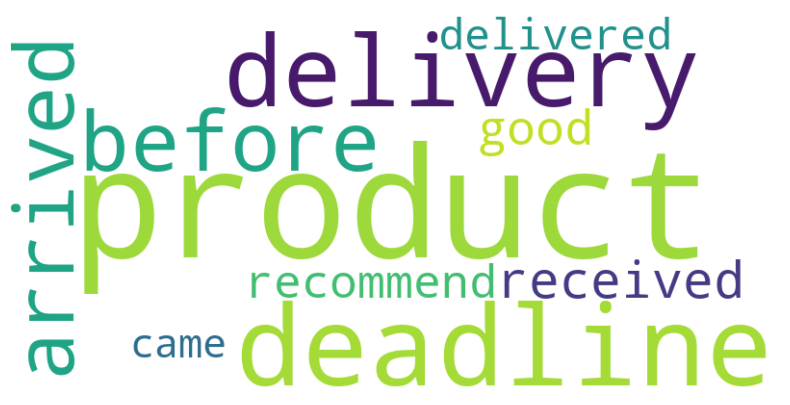

In [8]:
# The code proposed by ChatGPT to generate a word cloud given the list of most common words in customer reviews.

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Frequency analysis results with English translations
word_freq = {
    'product': 18344,
    'deadline': 8410,
    'delivery': 6486,
    'before': 5619,
    'arrived': 5535,
    'received': 5262,
    'good': 4592,
    'recommend': 4269,
    'delivered': 3769,
    'came': 3276
}

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

# 5.4 Co-occurrence analysis
## 5.4.2 Co-occurrence analysis in practice
### Listing 5.3

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siwiak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


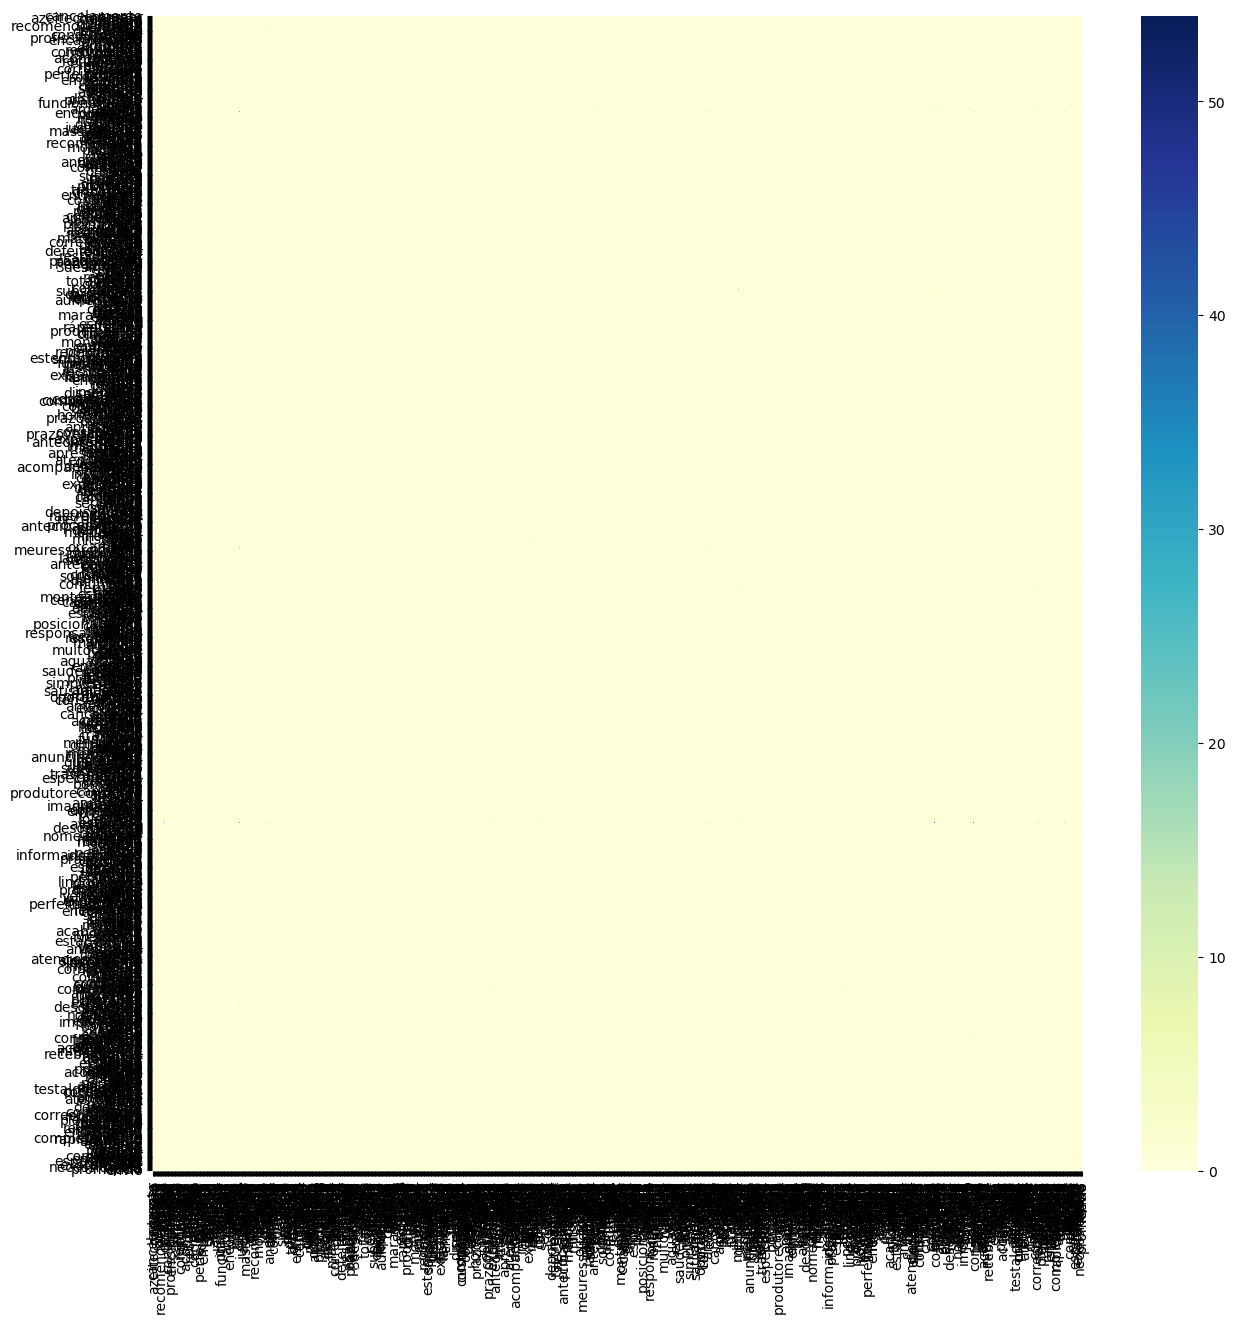

In [9]:
# The code proposed by ChatGPT to perform co-occurrence analysis on customer reviews.
#
# Manually introduced modifications:
# 1. A line to remove empty records from a dataframe was added.import pandas as pd.
# 2. The analysis was limited to the first 500 lines of data.

import numpy as np
import re
from nltk.corpus import stopwords
from collections import Counter
from itertools import combinations
from nltk import download
import seaborn as sns
import matplotlib.pyplot as plt

# Download the Portuguese stopwords
download('stopwords')

# Load your dataset (adapted)
data = pd.read_csv('olist_order_reviews_dataset.csv')
data = data.dropna(subset = ['review_comment_message'])
data = data.head(500)

# Preprocessing function
def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text).lower()
    words = text.split()
    words = [word for word in words if word not in stopwords.words('portuguese')]
    return words

# Co-occurrence function
def co_occurrence_matrix(corpus, window_size=5):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_index = {word: i for i, word in enumerate(vocab)}
    n = len(vocab)
    co_occurrence_matrix = np.zeros((n, n))

    for row in data['review_comment_message']:
        tokens = preprocess(row)
        for i, word in enumerate(tokens):
            for j in range(max(i - window_size, 0), min(i + window_size + 1, len(tokens))):
                if i != j:
                    co_occurrence_matrix[vocab_index[word], vocab_index[tokens[j]]] += 1
                    
    return co_occurrence_matrix, vocab_index

# Calculate co-occurrence matrix
corpus = [word for row in data['review_comment_message'] for word in preprocess(row)]
co_matrix, vocab_index = co_occurrence_matrix(corpus)

# Visualize the co-occurrence matrix using a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(co_matrix, xticklabels=vocab_index.keys(), yticklabels=vocab_index.keys(), cmap="YlGnBu")
plt.show()

### Listing 5.4

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siwiak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


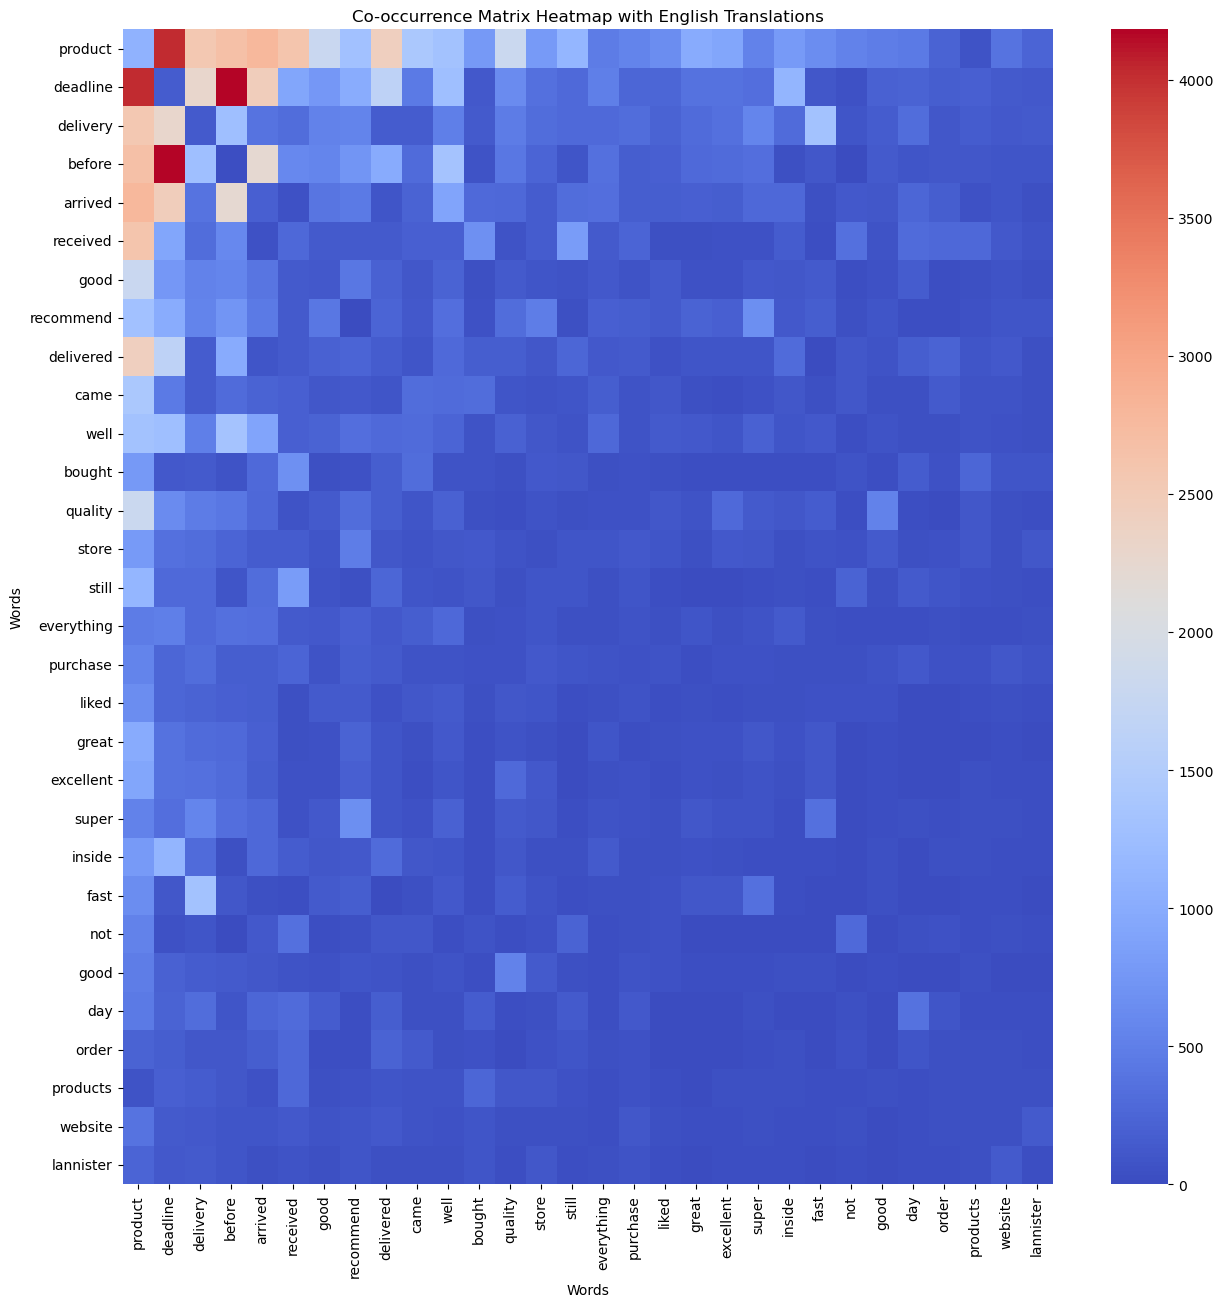

In [10]:
# The code proposed by ChatGPT to perform optimized co-occurrence analysis on customer reviews and provide English translations.
#
# Manually introduced modifications:
# 1. A line to remove empty records from a dataframe was added.import pandas as pd.

import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from collections import Counter
from itertools import combinations
from nltk import download
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix


# Download the Portuguese stopwords
download('stopwords')
stopwords_set = set(stopwords.words('portuguese'))

# Load your dataset (adapted)
data = pd.read_csv('olist_order_reviews_dataset.csv')
data = data.dropna(subset = ['review_comment_message'])

# Preprocessing function
def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text).lower()
    words = text.split()
    words = [word for word in words if word not in stopwords_set]
    return words


# Co-occurrence function
def co_occurrence_matrix(corpus, vocab, window_size=5):
    vocab_index = {word: i for i, word in enumerate(vocab)}
    n = len(vocab)
    co_occurrence_matrix = lil_matrix((n, n), dtype=np.float64)

    for row in data['review_comment_message']:
        tokens = preprocess(row)
        for i, word in enumerate(tokens):
            for j in range(max(i - window_size, 0), min(i + window_size + 1, len(tokens))):
                if i != j and word in vocab_index and tokens[j] in vocab_index:
                    co_occurrence_matrix[vocab_index[word], vocab_index[tokens[j]]] += 1
                    
    return co_occurrence_matrix, vocab_index

# Calculate co-occurrence matrix
corpus = [word for row in data['review_comment_message'] for word in preprocess(row)]
word_counts = Counter(corpus)
top_n_words = 30  # Adjust this number according to your needs
most_common_words = [word for word, count in word_counts.most_common(top_n_words)]
co_matrix, vocab_index = co_occurrence_matrix(corpus, most_common_words)

# English translations of the words (this part was added by ChatGPT when we asked directly for translations)
translations = {
    'produto': 'product',
    'prazo': 'deadline',
    'entrega': 'delivery',
    'antes': 'before',
    'chegou': 'arrived',
    'recebi': 'received',
    'bom': 'good',
    'recomendo': 'recommend',
    'entregue': 'delivered',
    'veio': 'came',
    'bem': 'well',
    'comprei': 'bought',
    'qualidade': 'quality',
    'loja': 'store',
    'ainda': 'still',
    'tudo': 'everything',
    'compra': 'purchase',
    'gostei': 'liked',
    'ótimo': 'great',
    'excelente': 'excellent',
    'super': 'super',
    'dentro': 'inside',
    'rápida': 'fast',
    'nao': 'not',
    'boa': 'good',
    'dia': 'day',
    'pedido': 'order',
    'produtos': 'products',
    'site': 'website',
    'lannister': 'lannister'
}

# Create a list of translated words for visualization
translated_words = [translations.get(word, word) for word in vocab_index.keys()]

# Visualize the co-occurrence matrix using a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(co_matrix.toarray(), xticklabels=translated_words, yticklabels=translated_words, cmap='coolwarm', annot=False)
plt.title("Co-occurrence Matrix Heatmap with English Translations")
plt.xlabel("Words")
plt.ylabel("Words")
plt.show()

# 5.5 Keyword Search
## 5.5.3 Generating keywords
### Listing 5.5

In [12]:
# Code partly proposed by ChatGPT. It calls ChatGPT API to generate a list of keywords. In order to use it you must provide your own API key.

from openai import OpenAI

def generate_keywords(temperature=0.5, max_tokens=150):
    client = OpenAI(
        api_key='<your-api-key>', # Make sure to use your actual API key here
    )

    prompt = """Generate a list of 20 keywords indicating positive sentiment to be used for searching customer reviews in Portuguese."""

    try:
        response = client.chat.completions.create(
            messages=[
                {
                    "role": "user",
                    "content": prompt,
                }
            ],
            model="gpt-4-0125-preview", # Replace with the model you have access to
            temperature=temperature,
            max_tokens=max_tokens,
        )
        return(response.choices[0].message.content.split("\n"))
    
    except Exception as e:
        print(f"An error occurred: {str(e)}")

# Example usage
print("Generated Keywords:")
print(generate_keywords())

Generated Keywords:
['1. Excelente', '2. Maravilhoso', '3. Incrível', '4. Perfeito', '5. Ótimo', '6. Fantástico', '7. Surpreendente', '8. Admirável', '9. Excepcional', '10. Impressionante', '11. Magnífico', '12. Positivo', '13. Satisfatório', '14. Louvável', '15. Encantador', '16. Agradável', '17. Notável', '18. Superior', '19. Incomparável', '20. Recomendado']


## 5.5.4 Searching for keywords
### Listing 5.6

In [13]:
# Importing libraries and data.
import pandas as pd

df = pd.read_csv('olist_order_reviews_dataset.csv')

# List of keywords proposed by ChatGPT.
keywords = [
    "excelente", "ótimo", "maravilhoso", "incrível", "fantástico",
    "perfeito", "bom", "eficiente", "durável", "confiável",
    "rápido", "custo-benefício", "recomendo", "satisfeito",
    "surpreendente", "confortável", "fácil de usar", "funcional",
    "melhor", "vale a pena"
]

# Second version of the keyword search function proposed by ChatGPT that copes with NaNs in the input.
def is_positive(review, keywords):
    if not isinstance(review, str):
        return False

    for keyword in keywords:
        if keyword.lower() in review.lower():
            return True
    return False

# Applying the function to the test DataFrame (adapted).
df['positive_review'] = df['review_comment_message'].apply(lambda x: is_positive(x, keywords))

## 5.5.5 Improving keyword search
### Listing 5.7
Human generated code to assess sensitivity and specificy of the positive review search.

In [14]:
# Remove rows that don't have reviews.
df = df.dropna(subset = ['review_comment_message'])

# Extract records with positive reviews assessed by keywords and by review scores.
posrev_keyword = df[df['positive_review']==True]
posrev_score = df[(df["review_score"]==5)|(df["review_score"]==4)]

# Perform set operations to determine true positives (TP), false positives (FP), false negatives (FN) and true negatives (TN).
TP = pd.merge(posrev_keyword, posrev_score)
FP = posrev_keyword[posrev_keyword["review_id"].isin(posrev_score["review_id"]) == False]
FN = posrev_score[posrev_score["review_id"].isin(posrev_keyword["review_id"]) == False]
TN = df[(df["review_id"].isin(posrev_keyword["review_id"]) == False) & (df["review_id"].isin(posrev_score["review_id"]) == False)]

# Calculate sensitivity and specificity
print("Sensitivity: ", round(len(TP) / (len(TP) + len(FN)),2))
print("Specificity: ", round(len(TN) / (len(TN) + len(FP)),2))

Sensitivity:  0.47
Specificity:  0.89


### Let's ask ChatGTP 5.8

Query: Can you apply steps 1,3 and 5 in a single text cleaning function?

The code generated by ChatGTP was adapted manually by adding comments and removing records that do not contain a review. A section to assess sensitivity and specificity of the positive review search was added manually.

The code works well but the sensitivity of search is very poor due to the fact that ChatGTP didn't propose to stem the keywords as well.

In [15]:
# Importing libraries and data.
import pandas as pd
import string
import nltk
from nltk.stem import RSLPStemmer

nltk.download('rslp')
stemmer = RSLPStemmer()

# Functions
def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

def remove_extra_whitespace(text):
    return ' '.join(text.split())

def stem_words(text):
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = remove_punctuation(text)
    text = remove_extra_whitespace(text)
    text = stem_words(text)
    return text

# Second version of the keyword search function proposed by ChatGPT that copes with NaNs in the input.
def is_positive(review, keywords):
    if not isinstance(review, str):
        return False

    for keyword in keywords:
        if keyword.lower() in review.lower():
            return True
    return False

# Reading data and getting rid of NaNs (adapted manually).
df = pd.read_csv('olist_order_reviews_dataset.csv')
df = df.dropna(subset = ['review_comment_message'])

# List of keywords proposed by ChatGPT.
keywords = [
    "excelente", "ótimo", "maravilhoso", "incrível", "fantástico",
    "perfeito", "bom", "eficiente", "durável", "confiável",
    "rápido", "custo-benefício", "recomendo", "satisfeito",
    "surpreendente", "confortável", "fácil de usar", "funcional",
    "melhor", "vale a pena"
]

# Applying the function to the test DataFrame. Variable names were adapted.
df['cleaned_review_comment_message'] = df['review_comment_message'].apply(clean_text)
df['positive_review'] = df['cleaned_review_comment_message'].apply(lambda x: is_positive(x, keywords))

# Assesing keyword search accuracy (added manually).

# Extract records with positive reviews assessed by keywords and by review scores.
posrev_keyword = df[df['positive_review']==True]
posrev_score = df[(df["review_score"]==5)|(df["review_score"]==4)]

# Perform set operations to determine true positives (TP), false positives (FP), false negatives (FN) and true negatives (TN).
TP = pd.merge(posrev_keyword, posrev_score)
FP = posrev_keyword[posrev_keyword["review_id"].isin(posrev_score["review_id"]) == False]
FN = posrev_score[posrev_score["review_id"].isin(posrev_keyword["review_id"]) == False]
TN = df[(df["review_id"].isin(posrev_keyword["review_id"]) == False) & (df["review_id"].isin(posrev_score["review_id"]) == False)]

# Calculate sensitivity and specificity
print("Sensitivity: ", round(len(TP) / (len(TP) + len(FN)),2))
print("Specificity: ", round(len(TN) / (len(TN) + len(FP)),2))

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\siwiak\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping stemmers\rslp.zip.


Sensitivity:  0.17
Specificity:  0.94


### Let's ask ChatGTP 5.8
Query: After applying the proposed cleaning to the reviews and performing the keyword search as described previously the sensitivity of the positive review search dropped drastically. Why?

The code generated by ChatGTP was adapted manually by adding comments and removing records that do not contain a review. A section to assess sensitivity and specificity of the positive review search was added manually.

The first code snippet applies the clean_text function also to the list of keywords. The second code snippet uses lemmatization instead of stemming.

Both solutions were provided by ChatGPT.

In [16]:
# 1st code snippet.
# Code with stemmed keywords.

# Importing libraries and data.
import pandas as pd
import string
import nltk
from nltk.stem import RSLPStemmer

nltk.download('rslp')
stemmer = RSLPStemmer()

# Functions
def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

def remove_extra_whitespace(text):
    return ' '.join(text.split())

def stem_words(text):
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = remove_punctuation(text)
    text = remove_extra_whitespace(text)
    text = stem_words(text)
    return text

# Second version of the keyword search function proposed by ChatGPT that copes with NaNs in the input.
def is_positive(review, keywords):
    if not isinstance(review, str):
        return False

    for keyword in keywords:
        if keyword.lower() in review.lower():
            return True
    return False

# Reading data and getting rid of NaNs (adapted).
df = pd.read_csv('olist_order_reviews_dataset.csv')
df = df.dropna(subset = ['review_comment_message'])

# List of keywords proposed by ChatGPT. Keywords are also stemmed.
keywords = [
    "excelente", "ótimo", "maravilhoso", "incrível", "fantástico",
    "perfeito", "bom", "eficiente", "durável", "confiável",
    "rápido", "custo-benefício", "recomendo", "satisfeito",
    "surpreendente", "confortável", "fácil de usar", "funcional",
    "melhor", "vale a pena"
]
new_keywords = [clean_text(x) for x in keywords]

# Applying the function to the test DataFrame. Variable names were adapted.
df['cleaned_review_comment_message'] = df['review_comment_message'].apply(clean_text)
df['positive_review'] = df['cleaned_review_comment_message'].apply(lambda x: is_positive(x, new_keywords))

# Keyword search accuracy

# Extract records with positive reviews assessed by keywords and by review scores.
posrev_keyword = df[df['positive_review']==True]
posrev_score = df[(df["review_score"]==5)|(df["review_score"]==4)]

# Perform set operations to determine true positives (TP), false positives (FP), false negatives (FN) and true negatives (TN).
TP = pd.merge(posrev_keyword, posrev_score)
FP = posrev_keyword[posrev_keyword["review_id"].isin(posrev_score["review_id"]) == False]
FN = posrev_score[posrev_score["review_id"].isin(posrev_keyword["review_id"]) == False]
TN = df[(df["review_id"].isin(posrev_keyword["review_id"]) == False) & (df["review_id"].isin(posrev_score["review_id"]) == False)]

# Calculate sensitivity and specificity
print("Sensitivity: ", round(len(TP) / (len(TP) + len(FN)),2))
print("Specificity: ", round(len(TN) / (len(TN) + len(FP)),2))

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\siwiak\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


Sensitivity:  0.56
Specificity:  0.83


In [21]:
# 2nd code snippet
# Code with review lemmatization instead of stemming.

# Importing libraries and data.
import pandas as pd
import string
import spacy

# install appropriate model with
# python -m spacy download pt_core_news_sm
nlp = spacy.load("pt_core_news_sm")

# Functions
def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

def remove_extra_whitespace(text):
    return ' '.join(text.split())

def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_words = [token.lemma_ for token in doc]
    return ' '.join(lemmatized_words)

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = remove_punctuation(text)
    text = remove_extra_whitespace(text)
    text = lemmatize_text(text)
    return text

# Second version of the keyword search function proposed by ChatGPT that copes with NaNs in the input.
def is_positive(review, keywords):
    if not isinstance(review, str):
        return False

    for keyword in keywords:
        if keyword.lower() in review.lower():
            return True
    return False

# Reading data and getting rid of NaNs (adapted).
df = pd.read_csv('olist_order_reviews_dataset.csv')
df = df.dropna(subset = ['review_comment_message'])

# List of keywords proposed by ChatGPT. Keywords are also stemmed.
keywords = [
    "excelente", "ótimo", "maravilhoso", "incrível", "fantástico",
    "perfeito", "bom", "eficiente", "durável", "confiável",
    "rápido", "custo-benefício", "recomendo", "satisfeito",
    "surpreendente", "confortável", "fácil de usar", "funcional",
    "melhor", "vale a pena"
]
keywords = [clean_text(x) for x in keywords]

# Applying the function to the test DataFrame. Variable names were adapted.
df['cleaned_review_comment_message'] = df['review_comment_message'].apply(clean_text)
df['positive_review'] = df['cleaned_review_comment_message'].apply(lambda x: is_positive(x, keywords))

# Keyword search accuracy

# Extract records with positive reviews assessed by keywords and by review scores.
posrev_keyword = df[df['positive_review']==True]
posrev_score = df[(df["review_score"]==5)|(df["review_score"]==4)]

# Perform set operations to determine true positives (TP), false positives (FP), false negatives (FN) and true negatives (TN).
TP = pd.merge(posrev_keyword, posrev_score)
FP = posrev_keyword[posrev_keyword["review_id"].isin(posrev_score["review_id"]) == False]
FN = posrev_score[posrev_score["review_id"].isin(posrev_keyword["review_id"]) == False]
TN = df[(df["review_id"].isin(posrev_keyword["review_id"]) == False) & (df["review_id"].isin(posrev_score["review_id"]) == False)]

# Calculate sensitivity and specificity
print("Sensitivity: ", round(len(TP) / (len(TP) + len(FN)),2))
print("Specificity: ", round(len(TN) / (len(TN) + len(FP)),2))

Sensitivity:  0.5
Specificity:  0.89


## 5.5.6 Comparing Generative AIs: code snippets for positive review searches 
### Let's ask ChatGPT 5.9

Query: I have a dataframe with a column "review_comment_message" that contains customer reviews. I want to extract positive reviews using keyword search. The reviews are in Portuguese. Propose a python code that can do it.

Output: The keyword search was entirely proposed by ChatGPT, yet it is pretty basic. Records with empty reviews were removed manually.

In [22]:
import pandas as pd

# Load your dataframe - adapted manually
df = pd.read_csv('olist_order_reviews_dataset.csv')
df = df.dropna(subset = ['review_comment_message'])

# List of positive keywords in Portuguese
positive_keywords = ['ótimo', 'excelente', 'bom', 'incrível', 'maravilhoso', 'perfeito', 'gostei', 'satisfeito', 'recomendo', 'amei']

# Define a function to check if a review contains positive keywords
def is_positive(review):
    for keyword in positive_keywords:
        if keyword.lower() in review.lower():
            return True
    return False

# Apply the function to the 'review_comment_message' column
df['is_positive'] = df['review_comment_message'].apply(is_positive)

# Create a new dataframe with only positive reviews
positive_reviews_df = df[df['is_positive']]

# Save the positive reviews to a new CSV file
positive_reviews_df.to_csv('positive_reviews.csv', index=False)


### Let's ask Gemini 5.10

Query: I have a dataframe with a column "review_comment_message" that contains customer reviews. I want to extract positive reviews using keyword search. The reviews are in Portuguese. Propose a python code that can do it.

Output: The keyword search strategy was entirely suggested by Gemini, but it didn't function seamlessly from the start. Beyond the typical need to manually remove empty records, there were a few issues, such as the omission of importing the nltk library and mistakes in the line that imports stopwords. These errors were manually fixed, and the corrected code is presented below.

In [24]:
import pandas as pd
import nltk  # fixed manually
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Download resources if needed
nltk.download('punkt')
nltk.download('stopwords') # fixed manually

# Define list of positive keywords
positive_keywords = ["ótimo", "excelente", "adorei", "recomendo", "maravilhoso"]

# Define stopwords for language
stop_words = stopwords.words('portuguese')

# Define sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Load your dataframe - adapted manually
df = pd.read_csv('olist_order_reviews_dataset.csv')
df = df.dropna(subset = ['review_comment_message'])

def extract_positive_reviews(df):
  """
  Extracts positive reviews from a dataframe containing "review_comment_message" column.

  Args:
    df: Pandas dataframe with "review_comment_message" column.

  Returns:
    Pandas dataframe with extracted positive reviews.
  """

  positive_reviews = []

  for index, row in df.iterrows():
    review = row["review_comment_message"]

    # Preprocess review
    words = word_tokenize(review.lower())
    filtered_words = [word for word in words if word not in stop_words]

    # Find keywords
    has_keyword = any(keyword in filtered_words for keyword in positive_keywords)

    # Sentiment analysis
    sentiment = analyzer.polarity_scores(review)

    # Positive review criteria: Positive keyword present OR positive sentiment compound score
    if has_keyword or sentiment['compound'] > 0.2:
      positive_reviews.append(review)

  return pd.DataFrame({"review_comment_message": positive_reviews})

# Extract positive reviews
positive_df = extract_positive_reviews(df)

# Print or use positive_df as needed
print(positive_df)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\siwiak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siwiak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                 review_comment_message
0     Parabéns lojas lannister adorei comprar pela I...
1     Vendedor confiável, produto ok e entrega antes...
2                                           Recomendo ,
3     Tô completamente apaixonada, loja super respon...
4     otimo vendedor chegou ate antes do prazo , ado...
...                                                 ...
9729          Recomendo, compra segura entrega correta.
9730    ótimo serviço e ótimo produto muito satisfeita!
9731  Muito obrigado,\r\n\r\nExcelente atendimento,b...
9732  Ficamos muito satisfeitos com o produto, atend...
9733  Excelente mochila, entrega super rápida. Super...

[9734 rows x 1 columns]


### Let's ask Gemini Advanced 5.11

Query: I have a dataframe with a column "review_comment_message" that contains customer reviews. I want to extract positive reviews using keyword search. The reviews are in Portuguese. Propose a python code that can do it.

Output: The keyword search strategy was entirely suggested by Gemini and worked flawlessly. The example data was replaced by our experimental dataset.

In [25]:
import pandas as pd

# Sample Data (Simulate your dataframe)
data = {'review_comment_message': ['Recebi bem antes do prazo estipulado.',
                                  'Produto incrível! Superou minhas expectativas',
                                  'Produto bom, porém o que veio para mim não condiz com a foto do anúncio.',
                                  'Gostaria de saber porque meu produto ainda não chegou.']}
df = pd.DataFrame(data)

# Keywords for positive sentiment in Portuguese
positive_keywords = ['bom', 'ótimo', 'excelente', 'incrível', 'gostei', 'satisfeito', 'superou', 'recomendo']

def extract_positive_reviews(df, keywords):
    """Extracts positive reviews from a dataframe based on a list of keywords."""

    positive_reviews = df[df['review_comment_message'].str.contains('|'.join(keywords), case=False)]
    return positive_reviews

# Extract the positive reviews
positive_reviews_df = extract_positive_reviews(df, positive_keywords)

# Print the results
print(positive_reviews_df)

# The code below was added manually to check how the code works for our dataset.
# Load your dataframe - adapted manually
df = pd.read_csv('olist_order_reviews_dataset.csv')
df = df.dropna(subset = ['review_comment_message'])

# Extract the positive reviews
positive_reviews_df = extract_positive_reviews(df, positive_keywords)

# Print the results
print(positive_reviews_df)

                              review_comment_message
1      Produto incrível! Superou minhas expectativas
2  Produto bom, porém o que veio para mim não con...
                              review_id                          order_id  \
29     2c5e27fc178bde7ac173c9c62c31b070  0ce9a24111d850192a933fcaab6fbad3   
36     08c9d79ec0eba1d252e3f52f14b8e6a9  e029f708df3cc108b3264558771605c6   
43     86c5cfa7fcbde303f704b60a78ced7d6  a6456e781cb962cc3f412b04de4fed7b   
67     109b5ce2dd11bb8460eff3b86da6fefc  25362fbf6aac4b01a28dee1e076acc26   
75     cb2fc3e5711b5ae85e0491ee18af63ed  34e6d418f368f8079ae152bc178bc66a   
...                                 ...                               ...   
99191  ed81d320e16c5999ff55348dce57d02b  daa7bd63b41e09a4d28579829649e6a2   
99196  58be140ccdc12e8908ff7fd2ba5c7cb0  0ebf8e35b9807ee2d717922d5663ccdb   
99197  51de4e06a6b701cb2be47ea0e689437b  b7467ae483dbe956fe9acdf0b1e6e3f4   
99202  7047578adefcc7c27319e3cf91ba1416  01da5549f136167573c8a302f00855

## 5.5.7 Seeking analytical inspiration
### Let's ask ChatGPT 5.13

Query: There is another column in the dataframe that contains the product score, a number from 1 to 5. How can I use this column to assess sensitivity and specificity of positive review extraction with help of keywords?

Output: In the ChatGTP generated code the correctness of positive reviews' extraction was assessed by sensitivy/specificity score.

In [26]:
# Run this code firt in order to obtain a functional input - a dataframe with a column "is_positive".
# The code was copied from Let's ask ChatGPT 5.9.
# It extracts positive reviews based on keywords.

import pandas as pd

# Load your dataframe - adapted manually
df = pd.read_csv('olist_order_reviews_dataset.csv')
df = df.dropna(subset = ['review_comment_message'])

# List of positive keywords in Portuguese
positive_keywords = ['ótimo', 'excelente', 'bom', 'incrível', 'maravilhoso', 'perfeito', 'gostei', 'satisfeito', 'recomendo', 'amei']

# Define a function to check if a review contains positive keywords
def is_positive(review):
    for keyword in positive_keywords:
        if keyword.lower() in review.lower():
            return True
    return False

# Apply the function to the 'review_comment_message' column
df['is_positive'] = df['review_comment_message'].apply(is_positive)


In [27]:
# This code was generated based on the prompt presented in Let's ask ChatGPT 5.12

import pandas as pd

# Assuming you have already loaded the dataframe and defined the is_positive function
# Define a function to determine if a review is positive based on the product score
def is_positive_based_on_score(score, threshold=4):
    return score >= threshold

# Apply the function to the 'product_score' column
df['is_positive_based_on_score'] = df['review_score'].apply(is_positive_based_on_score)

# Calculate the confusion matrix
TP = sum((df['is_positive'] == True) & (df['is_positive_based_on_score'] == True))
FP = sum((df['is_positive'] == True) & (df['is_positive_based_on_score'] == False))
TN = sum((df['is_positive'] == False) & (df['is_positive_based_on_score'] == False))
FN = sum((df['is_positive'] == False) & (df['is_positive_based_on_score'] == True))

# Calculate sensitivity (true positive rate) and specificity (true negative rate)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')


Sensitivity: 0.48
Specificity: 0.88


### Let's ask ChatGPT 5.14

Query: There is another column in the dataframe that contains the product score, a number from 1 to 5. How can I use this column to see if my positive review extraction is correct?

Output: The proposed solution to assess extraction correctness is fine, nevertheless, the sensitivity/specificity approach is likely to provide more information. Empty records were removed manually.

In [28]:
import pandas as pd

# Load your dataframe (adapted)
df = pd.read_csv('olist_order_reviews_dataset.csv')
df = df.dropna(subset = ['review_comment_message'])

# List of positive keywords in Portuguese
positive_keywords = ['ótimo', 'excelente', 'bom', 'incrível', 'maravilhoso', 'perfeito', 'gostei', 'satisfeito', 'recomendo', 'amei']

# Define a function to check if a review contains positive keywords
def is_positive(review):
    for keyword in positive_keywords:
        if keyword.lower() in review.lower():
            return True
    return False

# Apply the function to the 'review_comment_message' column
df['is_positive'] = df['review_comment_message'].apply(is_positive)

# Create a new dataframe with only positive reviews
positive_reviews_df = df[df['is_positive']]

# Calculate the average product score in the original dataframe
original_avg_score = df['review_score'].mean()
print(f"Original average product score: {original_avg_score}")

# Calculate the average product score in the positive reviews dataframe
positive_avg_score = positive_reviews_df['review_score'].mean()
print(f"Positive average product score: {positive_avg_score}")

# Compare the average scores
if positive_avg_score > original_avg_score:
    print("The average product score for positive reviews is higher than the original dataset. The extraction seems to be working correctly.")
else:
    print("The average product score for positive reviews is not higher than the original dataset. The extraction might not be accurate.")

# Save the positive reviews to a new CSV file
# positive_reviews_df.to_csv('positive_reviews.csv', index=False)

Original average product score: 3.66986358200942
Positive average product score: 4.500103455410718
The average product score for positive reviews is higher than the original dataset. The extraction seems to be working correctly.


### Let's ask ChatGPT 5.15

Query: There is another column in the dataframe "review_score" that contains the product score, a number from 1 to 5. How can I use this column to see if my positive review extraction is correct?

Output: Almost identical query made ChatGPT generate a completely different approach to the problem. This approach is problematic - see Chapter 5 for more information. Empty records were removed manually.

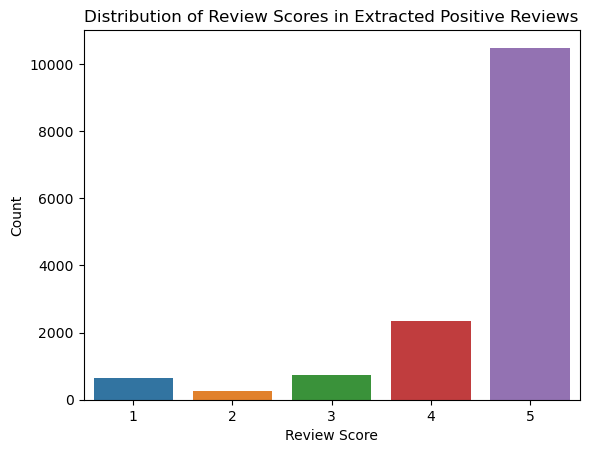

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataframe (adapted).
df = pd.read_csv('olist_order_reviews_dataset.csv')
df = df.dropna(subset = ['review_comment_message'])

# List of positive keywords in Portuguese
positive_keywords = ['ótimo', 'excelente', 'bom', 'incrível', 'maravilhoso', 'perfeito', 'gostei', 'satisfeito', 'recomendo', 'amei']

# Define a function to check if a review contains positive keywords
def is_positive(review):
    for keyword in positive_keywords:
        if keyword.lower() in review.lower():
            return True
    return False

# Apply the function to the 'review_comment_message' column
df['is_positive'] = df['review_comment_message'].apply(is_positive)

# Create a new dataframe with only positive reviews
positive_reviews_df = df[df['is_positive']]

# Visualize the distribution of review scores in the positive reviews dataframe
sns.countplot(x='review_score', data=positive_reviews_df)
plt.title('Distribution of Review Scores in Extracted Positive Reviews')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

# 5.6 Dictionary-based methods
## 5.6.4 Adapting the code to chosen resources
### Let's ask ChatGPT 5.18

Query: Let's use the SentiLex lexicon! Can you adapt the code accordingly?

Output: In order for the code to be functional a correct path to input data and lexicon should be specified. Additionally, the lexicon we downloaded was not in the correct format and required additional attention (see below). In the current form the code is not fully functional.

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from unidecode import unidecode

# Load your DataFrame
# df = pd.read_csv('your_reviews_file.csv')

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

# Function to preprocess text
def preprocess(text):
    text = unidecode(text.lower())  # Normalize
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

# Assuming SentiLex is in a CSV file with 'word' and 'polarity' columns
sentilex_df = pd.read_csv('SentiLex-lem-PT02.txt', encoding='utf-8')
sentilex_dict = pd.Series(sentilex_df.polarity.values, index=sentilex_df.word).to_dict()

# Modify the scoring function to use SentiLex
def score_review(tokens):
    scores = [sentilex_dict.get(word, 0) for word in tokens]
    return sum(scores)

# Assuming 'reviews' is the column with text data
df['processed_reviews'] = df['reviews'].apply(preprocess)
df['sentiment_score'] = df['processed_reviews'].apply(score_review)
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

### Let's ask ChatGPT 5.19

Query: My Sentilex file comes in a txt format and its first line looks like this:
à-vontade.PoS=N;TG=HUM:N0;POL:N0=1;ANOT=MAN
How can I load it?


Output: The proposed code works well. The filepath was adapted manually.

In [35]:
def load_sentilex(filepath):
    sentilex_dict = {}
    with open(filepath, 'r', encoding='utf-8') as file:
        for line in file:
            parts = line.strip().split(';')
            word = parts[0].split('.')[0]  # Get the word before '.PoS='
            pol_entry = [part for part in parts if part.startswith('POL:N0=')]
            if pol_entry:
                # Assuming there's exactly one 'POL:N0=' entry per line
                polarity = int(pol_entry[0].split('=')[1])
                sentilex_dict[word] = polarity
    return sentilex_dict

# Example usage
filepath = 'SentiLex-lem-PT02.txt'  # manually adapted
sentilex_dict = load_sentilex(filepath)

# Now sentilex_dict is ready to be used as in the previous example

### Let's ask ChatGPT 5.18 and 5.19 - combined

The lexicon loader provided in script 5.19 was manually added to the code snippet proposed by ChatGPT in script 5.18. The input file names were adapted accordingly, so the code is functional now. Additionally, we added a section to assess the quality of our analysis.

In [36]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from unidecode import unidecode

# Load your DataFrame and removing rows with no reviews (manually adapted)
df = pd.read_csv('olist_order_reviews_dataset.csv')
df = df.dropna(subset = ['review_comment_message'])

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

# Function to preprocess text
def preprocess(text):
    text = unidecode(text.lower())  # Normalize
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

# Manually pasted code from script 5.28 for loading the SentiLex lexicon.
def load_sentilex(filepath):
    sentilex_dict = {}
    with open(filepath, 'r', encoding='utf-8') as file:
        for line in file:
            parts = line.strip().split(';')
            word = parts[0].split('.')[0]  # Get the word before '.PoS='
            pol_entry = [part for part in parts if part.startswith('POL:N0=')]
            if pol_entry:
                # Assuming there's exactly one 'POL:N0=' entry per line
                polarity = int(pol_entry[0].split('=')[1])
                sentilex_dict[word] = polarity
    return sentilex_dict

# Example usage
filepath = 'SentiLex-lem-PT02.txt'  # manually adapted
sentilex_dict = load_sentilex(filepath)

# Modify the scoring function to use SentiLex
def score_review(tokens):
    scores = [sentilex_dict.get(word, 0) for word in tokens]
    return sum(scores)

# Assuming 'reviews' is the column with text data
df['processed_reviews'] = df['review_comment_message'].apply(preprocess) #column name adapted manually
df['sentiment_score'] = df['processed_reviews'].apply(score_review)
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

# Assessing sentiment analysis accuracy (added manually)

df = df.drop('processed_reviews', axis=1)

# Extract records with positive reviews assessed by sentiment analysis and by review scores.
posrev_senti = df[df['sentiment']=='positive']
posrev_score = df[(df['review_score']==5)|(df['review_score']==4)]


# Perform set operations to determine true positives (TP), false positives (FP), false negatives (FN) and true negatives (TN).
TP = pd.merge(posrev_senti, posrev_score)
FP = posrev_senti[posrev_senti["review_id"].isin(posrev_score["review_id"]) == False]
FN = posrev_score[posrev_score["review_id"].isin(posrev_senti["review_id"]) == False]
TN = df[(df["review_id"].isin(posrev_senti["review_id"]) == False) & (df["review_id"].isin(posrev_score["review_id"]) == False)]

# Calculate sensitivity and specificity
print("Sensitivity: ", round(len(TP) / (len(TP) + len(FN)),2))
print("Specificity: ", round(len(TN) / (len(TN) + len(FP)),2))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\siwiak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siwiak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sensitivity:  0.36
Specificity:  0.88


## 5.6.6 Improving dictionary-based search
### Let's ask ChatGPT 5.20 - manually combined with scripts 5.18 and 5.19
Query: The results of our sentiment analysis are pretty poor and it seems we have low sensitivity in extracting positive reviews. It might be because our lexicon is a collection of lemmas. Can you adapt the code accordingly?

Output: ChatGPT proposed a correct modification of the code presented before. The analysis presented in script 5.17 was improved by adding lemmatization as an initial step of input data cleaning. The code snippet proposed in script 5.18 was added manually to load the lexicon.  A piece of code was added at the end to assess sensitivity and specificity of the sentiment analysis.

In [37]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from unidecode import unidecode
import spacy

# Load your DataFrame and removing rows with no reviews (manually adapted)
df = pd.read_csv('olist_order_reviews_dataset.csv')
df = df.dropna(subset = ['review_comment_message'])

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

# Load the Portuguese language model
nlp = spacy.load('pt_core_news_sm')

def preprocess_and_lemmatize(text):
    text = unidecode(text.lower())  # Normalize
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc if token.is_alpha and token.lemma_ not in stop_words]
    return lemmas

# Manually pasted code from script 5.28 for loading the SentiLex lexicon.
def load_sentilex(filepath):
    sentilex_dict = {}
    with open(filepath, 'r', encoding='utf-8') as file:
        for line in file:
            parts = line.strip().split(';')
            word = parts[0].split('.')[0]  # Get the word before '.PoS='
            pol_entry = [part for part in parts if part.startswith('POL:N0=')]
            if pol_entry:
                # Assuming there's exactly one 'POL:N0=' entry per line
                polarity = int(pol_entry[0].split('=')[1])
                sentilex_dict[word] = polarity
    return sentilex_dict

# Example usage
filepath = 'SentiLex-lem-PT02.txt'  # manually adapted
sentilex_dict = load_sentilex(filepath)

# Modify the scoring function to use SentiLex
def score_review(tokens):
    scores = [sentilex_dict.get(word, 0) for word in tokens]
    return sum(scores)

# Assuming 'reviews' is the column with text data
df['processed_reviews'] = df['review_comment_message'].apply(preprocess_and_lemmatize) #column name adapted manually
df['sentiment_score'] = df['processed_reviews'].apply(score_review)
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

# Assessing sentiment analysis accuracy (added manually)

df = df.drop('processed_reviews', axis=1)

# Extract records with positive reviews assessed by sentiment analysis and by review scores.
posrev_senti = df[df['sentiment']=='positive']
posrev_score = df[(df['review_score']==5)|(df['review_score']==4)]


# Perform set operations to determine true positives (TP), false positives (FP), false negatives (FN) and true negatives (TN).
TP = pd.merge(posrev_senti, posrev_score)
FP = posrev_senti[posrev_senti["review_id"].isin(posrev_score["review_id"]) == False]
FN = posrev_score[posrev_score["review_id"].isin(posrev_senti["review_id"]) == False]
TN = df[(df["review_id"].isin(posrev_senti["review_id"]) == False) & (df["review_id"].isin(posrev_score["review_id"]) == False)]

# Calculate sensitivity and specificity
print("Sensitivity: ", round(len(TP) / (len(TP) + len(FN)),2))
print("Specificity: ", round(len(TN) / (len(TN) + len(FP)),2))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\siwiak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siwiak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sensitivity:  0.41
Specificity:  0.85
